In [55]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from helper import *

## Calculate the Focusing force according to Benedetti 2017 paper

In [56]:
def H(q):
    if q < 0:
        print('The input cannot be negative!')
        return 
    if q == 0:
        return 1
    return (1 - np.exp(-q)) / q
# r and xi are numbers.
def Wr_benedetti(r,xi,sigma,M_over_m = 1836,nb0_over_n0 = 1000,Zi = 1):
    q = r ** 2 / (2 * sigma ** 2)
    return (r/2) * (1 + Zi * xi ** 2 * H(q))
# r is a number, xi is an array / xi is a number, r is an array
def Wr(r,xi,sigma,M_over_m = 1836,nb0_over_n0 = 1000,Zi = 1):
    if (type(r) == int or type(r) == float) and (type(xi) == list or type(xi) == np.ndarray):
        return np.array([Wr_benedetti(r,i,sigma,M_over_m,nb0_over_n0,Zi) for i in xi])
    elif (type(xi) == int or type(xi) == float) and (type(r) == list or type(r) == np.ndarray):
        return np.array([Wr_benedetti(i,xi,sigma,M_over_m,nb0_over_n0,Zi) for i in r])
    else:
        print('Wrong input type for r a xi')

# Plot longitudinal lineout of $F_r$

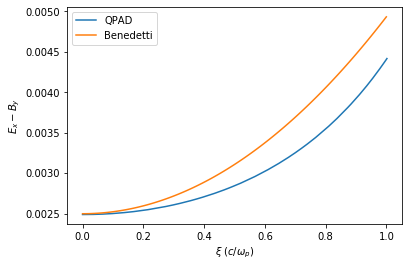

In [57]:
# benedetti prediction
r = 0.005
xi = np.linspace(0,1,100)
sigma = 0.015
M_over_m = 1836
nb0_over_n0 = 1000
Zi = 1

Fr = Wr(r,xi,sigma,M_over_m,nb0_over_n0,Zi)

# QPAD simulation result
filename_Fr = '../Fields/Fr/Merged_angle_0/fr_00000001.h5'
lineout_position = r
xi_simu, Fr_simu = get_lineout(filename_Fr,'longitudinal',lineout_position,'QPAD')
# select lineout range
xi_simu, Fr_simu = select_lineout_range(xi_simu, Fr_simu,xi_simu[0],1)
# Plot them together to compare
plt.plot(xi_simu, Fr_simu,label = 'QPAD')
plt.plot(xi,Fr,label = 'Benedetti')
plt.xlabel('$\\xi \\;(c/\\omega_p)$')
plt.ylabel('$E_x - B_y$')
plt.legend()
plt.rcParams.update({'font.size': 10})
plt.show()

# Plot transverse lineout of $F_r$

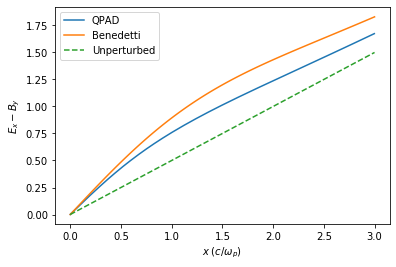

In [58]:
# benedetti prediction
sigma = 0.015
xi = 1
r = np.linspace(0,3 * sigma,100)
M_over_m = 1836
nb0_over_n0 = 1000
Zi = 1

Fr = Wr(r,xi,sigma,M_over_m,nb0_over_n0,Zi)

# QPAD simulation result
filename_Fr = '../Fields/Fr/Merged_angle_0/fr_00000001.h5'
lineout_position = xi
x_simu, Fr_simu = get_lineout(filename_Fr,'transverse',lineout_position,'QPAD')
# select lineout range
x_simu, Fr_simu = select_lineout_range(x_simu, Fr_simu,0,3 * sigma)
# Plot them together to compare
plt.plot(x_simu/sigma, Fr_simu/sigma,label = 'QPAD')
plt.plot(r/sigma,Fr/sigma,label = 'Benedetti')
plt.plot(r/sigma,0.5*r/sigma,'--',label = 'Unperturbed')
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.ylabel('$E_x - B_y$')
plt.legend()
plt.rcParams.update({'font.size': 10})
plt.show()

# Plot ion density lineout

In [9]:
# Get lineout 
filename_ion_density = '../Species2/Charge/Merged_angle_0/charge_00000010.h5'
lineout_position = 0
x_ni, ni = get_lineout(filename_ion_density,'transverse',lineout_position,'QPAD')

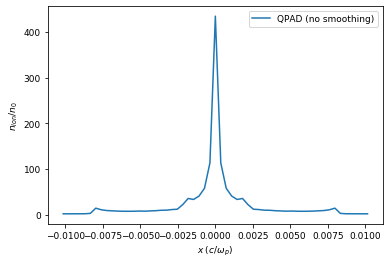

In [10]:
# select visualization range
x_min = -0.01
x_max = 0.01

x_ni_sub, ni_sub = select_lineout_range(x_ni, ni, x_min, x_max)

### Plot the data
plt.plot(x_ni_sub, ni_sub,label = 'QPAD (no smoothing)')
plt.legend(loc='upper right')
plt.xlabel('$x \\;(c/\\omega_p)$')
plt.ylabel('$n_{ion} /n_0$')
plt.rcParams.update({'font.size': 9})
plt.show()

# Perform a linear regression

0.00036255989257405474


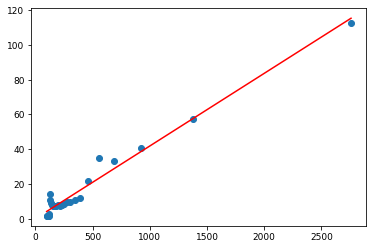

In [11]:
first_pos_idx = (len(x_ni_sub) + 1)// 2
x = x_ni_sub[first_pos_idx :]
# make sure the first x is positiv
print(x[0])
n = ni_sub[first_pos_idx :]

x_inverse = 1 / x
plt.scatter(x_inverse,n)

x_inverse = x_inverse.reshape(-1,1)
n = n.reshape(-1,1)
model = LinearRegression(fit_intercept=False)
model.fit(x_inverse,n)
n_pred = model.predict(x_inverse)
plt.plot(x_inverse, n_pred, color='red')

# Simple example of performing linear regression in Python

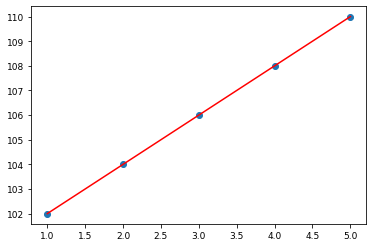

In [58]:
a = np.array([1,2,3,4,5])
b = 2 * a + 100
a = a.reshape(-1,1)
b = b.reshape(-1,1)
model = LinearRegression(fit_intercept=True)
model.fit(a,b)
b_pred = model.predict(a)

plt.scatter(a, b)
plt.plot(a, b_pred, color='red')
plt.show()